First, load the various packages and import the data from the file

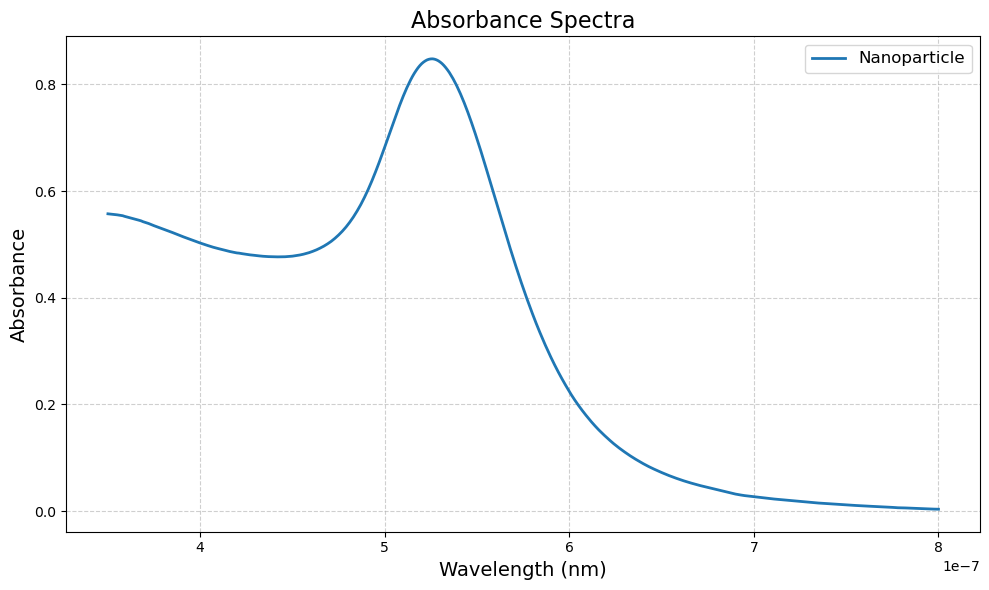

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('module://matplotlib_inline.backend_inline')

W_P = 13e15 # Plasma frequency in radians for bulk gold

def ecs(l, eps1, eps2, epsm, R):
    """
    l : float
        Wavelength
    eps1 : float
        Real part of the gold dielectric function.
    eps2 : float
        Imaginary part of the gold dielectric function.
    epsm : float
        Dielectric constant of the medium.
    R : float
        Radius of the nanoparticle.
    """
    return np.float32(24 * np.pi**2 * R**3 * epsm**1.5 * eps2 / (l * ((eps1 + 2 * epsm)**2 + eps2**2)))

def eps1_R(eps1, gamma_inf, R, w, w_p=W_P):
    """
    eps1 : float
        Real part of the gold dielectric function.
    gamma_inf : float
        Gamma infinity value.
    R : float
        Radius of the nanoparticle.
    w : float
        Angular frequency.
    """
    gamma_R = np.float32(gamma_inf + 1.4e6 / R)
    return np.float32(eps1 +  w_p**2 * (1 / (w**2 + gamma_inf**2) - 1 / (w**2 + gamma_R**2)))

def eps2_R(eps2, gamma_inf, R, w, w_p = W_P):
    """
    eps2 : float
        Imaginary part of the gold dielectric function.
    gamma_inf : float
        Gamma infinity value.
    R : float
        Radius of the nanoparticle.
    w : float
        Angular frequency.
    """
    gamma_R = np.float32(gamma_inf + 1.4e6 / R)
    return np.float32(eps2 - w_p**2 / w * (gamma_inf / (w**2 + gamma_inf**2) - gamma_R / (w**2 + gamma_R**2)))

def log_normal_distribution(x, mu, sigma):
    """
    Defines a log-normal distribution function.
    
    Parameters:
    x : array-like
        Independent variable.
    mu : float
        Mean of the logarithm of the distribution.
    sigma : float
        Standard deviation of the logarithm of the distribution.
    
    Returns:
    array-like
        Probability density function values.
    """
    coefficient = 1 / (x * sigma * np.sqrt(2 * np.pi))
    exponent = -((np.log(x) - np.log(mu))**2) / (2 * sigma**2)
    return coefficient * np.exp(exponent)

# Read the bulk dielectric data from the files
with open('./data/Au-Rosenblatt-interp.txt', 'r') as file_bulk:
    # Skip the header and split each line by whitespace, then convert to float if possible
    bulk_data = []
    for line in file_bulk.readlines()[1:]:
        parts = line.strip().split()
        if len(parts) == 3:
            try:
                bulk_data.append([float(parts[0])*1e-9, float(parts[1]), float(parts[2])])
            except ValueError:
                continue
    bulk_data = np.array(bulk_data)
file_bulk.close()

# Read the bulk dielectric data from the files
with open('./data/bulkAu.txt', 'r') as old_file_bulk:
    # Skip the header and split each line by whitespace, then convert to float if possible
    old_bulk_data = []
    for line in old_file_bulk.readlines()[1:]:
        parts = line.strip().split()
        if len(parts) == 3:
            try:
                old_bulk_data.append([float(parts[0])*1e-9, float(parts[1]), float(parts[2])])
            except ValueError:
                continue
    old_bulk_data = np.array(old_bulk_data)
old_file_bulk.close()

# Read the nanoparticle absorbance data from the files
with open('./data/G4_np.txt', 'r') as file_np:
    # Skip the header and split each line by whitespace, then convert to float if possible
    np_data = []
    for line in file_np.readlines()[18:]:
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                np_data.append([float(parts[0]), float(parts[1])])
            except ValueError:
                continue
    np_data = np.array(np_data)
    np_data[:, 0] *= 1e-9
    np_data = np_data[::-1]
file_np.close()

# Read the preAU absorbance data from the files
with open('./data/G4_preAu.txt', 'r') as file_pre:
    # Skip the header and split each line by whitespace, then convert to float if possible
    pre_data = []
    for line in file_pre.readlines()[18:]:
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                pre_data.append([float(parts[0]), float(parts[1])])
            except ValueError:
                continue
    pre_data = np.array(pre_data)
file_pre.close()

# Plot data for nanoparticle and preAus
plt.figure(figsize=(10,6))
plt.plot(np_data[:,0], np_data[:,1], label='Nanoparticle', color='tab:blue', linewidth=2)
#plt.plot(pre_data[:,0], pre_data[:,1], label='preAu', color='tab:orange', linewidth=2)
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Absorbance', fontsize=14)
plt.title('Absorbance Spectra', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

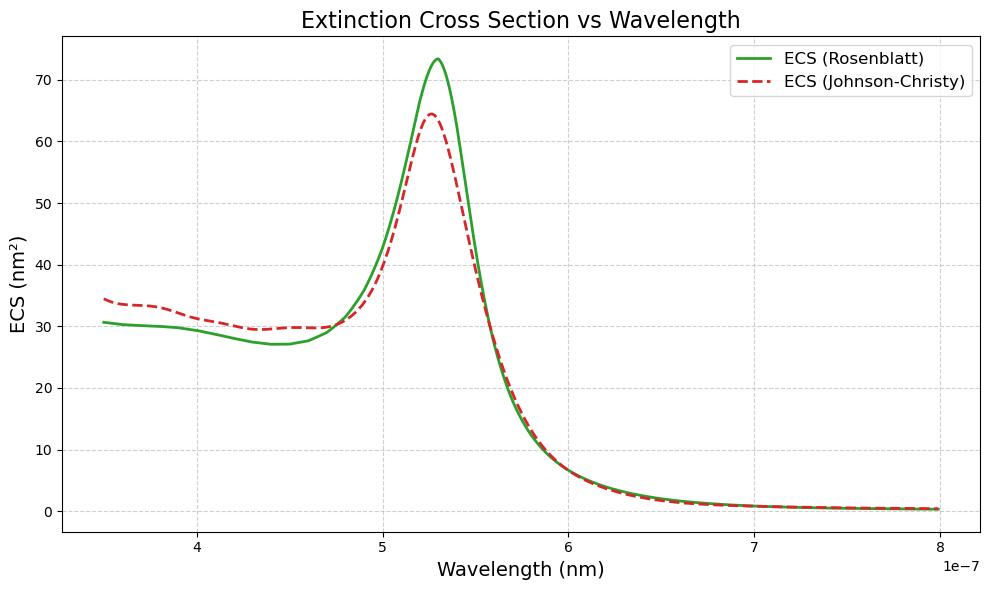

In [2]:

# bulk_data extraction
filtered_bulk = bulk_data[(bulk_data[:, 0] >= 350E-9) & (bulk_data[:, 0] <= 800E-9)]
l = filtered_bulk[:, 0]
eps1 = filtered_bulk[:, 1]
eps2 = filtered_bulk[:, 2]

old_filtered_bulk = old_bulk_data[(old_bulk_data[:, 0] >= 350E-9) & (old_bulk_data[:, 0] <= 800E-9)]
old_l = old_filtered_bulk[:, 0]
old_eps1 = old_filtered_bulk[:, 1]
old_eps2 = old_filtered_bulk[:, 2]

# Plot extinction cross section
plt.figure(figsize=(10,6))
plt.plot(l, 1e18*ecs(l, eps1, eps2, 2, 5e-9), label='ECS (Rosenblatt)', color='tab:green', linewidth=2)
plt.plot(old_l, 1e18*ecs(old_l, old_eps1, old_eps2, 2, 5e-9), label='ECS (Johnson-Christy)', color='tab:red', linestyle='--', linewidth=2)
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('ECS (nm²)', fontsize=14)
plt.title('Extinction Cross Section vs Wavelength', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

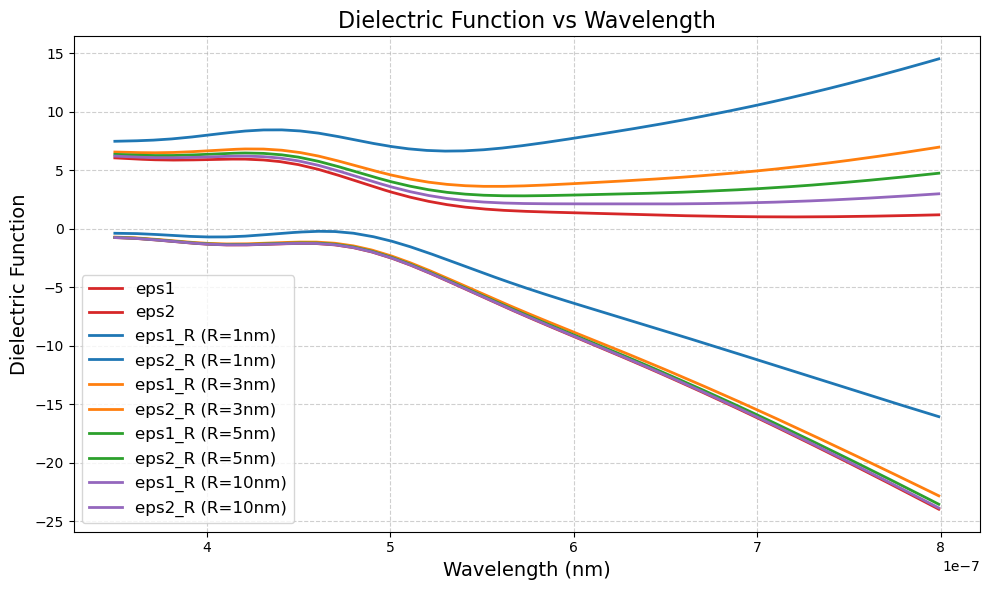

In [3]:
#print eps1 and eps2 with test gamma_inf
gamma_inf = 0.07
plt.figure(figsize=(10,6))
plt.plot(l, eps1, label='eps1', color='tab:red', linewidth=2)
plt.plot(l, eps2, label='eps2', color='tab:red', linewidth=2)
for R, color in zip([1e-9, 3e-9, 5e-9, 10e-9], ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']):
    plt.plot(l, eps1_R(eps1, gamma_inf, R, np.float32(2 * np.pi * 3e8 / l)), label=f'eps1_R (R={R*1e9:.0f}nm)', color=color, linewidth=2)
    plt.plot(l, eps2_R(eps2, gamma_inf, R, np.float32(2 * np.pi * 3e8 / l)), label=f'eps2_R (R={R*1e9:.0f}nm)', color=color, linewidth=2)
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Dielectric Function', fontsize=14)
plt.title('Dielectric Function vs Wavelength', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Minimum chi2: 0.9048197306267037
Best fit parameters with uncertainties:
R: 10.00 nm ± 1.50 nm
Rho: 2.64e+07 m^-3 ± 9.88e+06 m^-3
N: 1.37 ± 0.05
Gamma_inf: 3.360e+14 ± 7.187e+14
K: 2.637e-17 ± 1.544e-17
Filling fraction: 1.10e-16 ± 6.47e-17


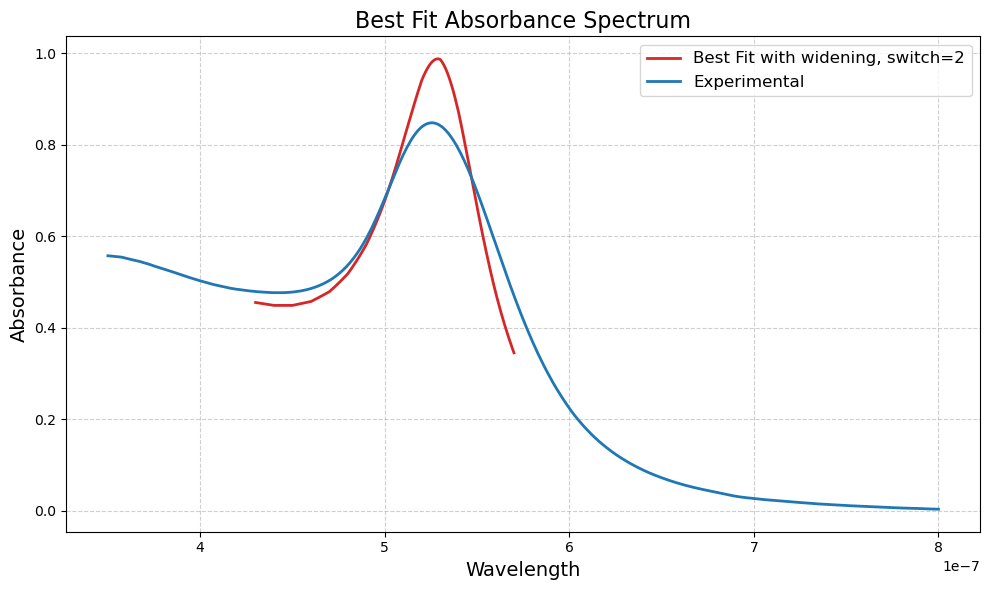

In [ ]:
#We used 4 and 5 in the report
interval = 4
match interval:
    case 1: # Restricted rho
        steps = 30
        R = np.linspace(1e-9, 10e-9, steps, dtype=np.float32)
        Rho = np.linspace(1.7e15, 1.9e15, steps, dtype=np.float32)
        N = np.linspace(1.2, 1.5, steps, dtype=np.float32)
        Gamma_inf = np.linspace(0.01, 0.3, steps, dtype=np.float32)
    case 2: # Free parameters
        steps = 20
        R = np.linspace(4e-9, 7e-9, steps, dtype=np.float32)
        Rho = np.logspace(18, 19, steps, dtype=np.float32)
        N = np.linspace(1.40, 1.40, 1, dtype=np.float32)
        Gamma_inf = np.linspace(0.01, 0.3, steps, dtype=np.float32)
    case 3: # Parameters for radius distribution
        steps = 20
        R = np.linspace(1e-9, 10e-9, 50, dtype=np.float32)
        Rho = np.logspace(7, 9, 20, dtype=np.float32)
        N = np.linspace(1.40, 1.40, 1, dtype=np.float32)
        Gamma_inf = np.linspace(0.01, 0.5, 10, dtype=np.float32)
    case 4: # Parameters for radius distribution (gamma test)
        R = np.linspace(3.4e-9, 3.8e-9, 30, dtype=np.float32)
        Rho = np.logspace(np.log10(6e8), np.log10(9e8), 10, dtype=np.float32)
        N = np.linspace(1.36, 1.40, 10, dtype=np.float32)
        Gamma_inf = np.linspace(5e12, 5e13, 10, dtype=np.float32)
    case 5: # Parameters for radius in the SEM range
        R = np.linspace(10e-9, 13e-9, 10, dtype=np.float32)
        Rho = np.logspace(np.log10(1e7), np.log10(1e8), 20, dtype=np.float32)
        N = np.linspace(1.35, 1.45, 10, dtype=np.float32)
        Gamma_inf = np.logspace(12, 18, 20, dtype=np.float32)
    

# bulk_data filtering
wl_begin = 430e-9
wl_end = 570e-9
filtered_bulk = bulk_data[(bulk_data[:, 0] >= wl_begin) & (bulk_data[:, 0] <= wl_end)]
l = filtered_bulk[:, 0]
eps1 = filtered_bulk[:, 1]
eps2 = filtered_bulk[:, 2]

# np_data filtering
filtered_np = np_data[(np_data[:, 0] >= wl_begin) & (np_data[:, 0] <= wl_end)]
np_abs = filtered_np[:, 1]

# R distribution
switch = 2
def R_dist(centroid, R_input):
    """
    Define a PDF for the radius distribution.
    """
    if switch == 0: # Box function
        return np.where((R_input >= 5.9e-9) & (R_input <= 6.5e-9), 1, 0)
    elif switch == 1: #Gaussian distribution (limited to 1e-9 to 100e-9)
        sigma = 2e-9
        d = np.exp(-0.5 * ((R_input - centroid) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
        return np.where((R_input >= 1e-9) & (R_input <= 100e-9), d, 0)
    elif switch == 2: #Log-normal distribution
        return log_normal_distribution(R_input, centroid, 0.3)

R_axis = np.linspace(1e-10, 50e-9, 1000, dtype=np.float32)
# Create a meshgrid for the parameters
R_, Rho_, N_, Gamma_inf_ = np.meshgrid(R, Rho, N, Gamma_inf, indexing='ij')

# Calculate the PDF normalization constant before the newaxis to reduce memory usage
PDF_norm = np.sum(R_dist(R_[..., np.newaxis], R_axis[np.newaxis, np.newaxis, np.newaxis, np.newaxis, :]) * (R_axis[1] - R_axis[0]), axis=-1)

# Add axis to make space for the wavelength l
R_ = R_[..., np.newaxis]
Rho_ = Rho_[..., np.newaxis]
N_ = N_[..., np.newaxis]
Gamma_inf_ = Gamma_inf_[..., np.newaxis]
l_ = l[np.newaxis, np.newaxis, np.newaxis, np.newaxis, :]

# Calculate the dielectric function now that the parameters are ready for broadcasting
eps1_R_ = eps1_R(eps1, Gamma_inf_, R_, np.float32(2 * np.pi * 3e8 / l_))
eps2_R_ = eps2_R(eps2, Gamma_inf_, R_, np.float32(2 * np.pi * 3e8 / l_))

R_PDF_ = np.float32(R_dist(R_, R_axis))

# Absorption calculation. Ordered as (R, Rho, N, Gamma_inf, l)
ecs_tot = np.sum(ecs(l_[..., np.newaxis], eps1_R_[..., np.newaxis], eps2_R_[..., np.newaxis], N_[..., np.newaxis]**2, R_[..., np.newaxis]) * R_PDF_[..., np.newaxis, :], axis=-1)
ecs_tot /= PDF_norm[..., np.newaxis] # Normalize the ECS
absorption = ecs_tot * np.float32(np.log10(np.e) * 0.01 * Rho_)
dist = absorption - np_abs[np.newaxis, np.newaxis, np.newaxis, np.newaxis, :]
chi2 = np.sum(dist**2 / np_abs[np.newaxis, np.newaxis, np.newaxis, np.newaxis, :], axis=4)
print("Minimum chi2:", np.min(chi2))

# Find the indexes of the minimum chi2 values (collect only the best chi2, not the top n_min)
min_flat_index = np.argmin(chi2)
min_index = np.unravel_index(min_flat_index, chi2.shape)

R_best = R[min_index[0]]
Rho_best = Rho[min_index[1]]
N_best = N[min_index[2]]
Gamma_inf_best = Gamma_inf[min_index[3]]
absorption_best = absorption[min_index]

# Calculate uncertainties for the best fit parameters
chi2_min = np.min(chi2)
uncertainty_threshold = chi2_min + 1  # 1-sigma uncertainty

# Find the ranges for each parameter within the uncertainty threshold
R_uncertainty = R[np.where(np.min(chi2, axis=(1, 2, 3)) <= uncertainty_threshold)]
Rho_uncertainty = Rho[np.where(np.min(chi2, axis=(0, 2, 3)) <= uncertainty_threshold)]
N_uncertainty = N[np.where(np.min(chi2, axis=(0, 1, 3)) <= uncertainty_threshold)]
Gamma_inf_uncertainty = Gamma_inf[np.where(np.min(chi2, axis=(0, 1, 2)) <= uncertainty_threshold)]

# Calculate uncertainties for K and Filling fraction using error propagation
R_error = (R_uncertainty.max() - R_uncertainty.min()) / 2
Rho_error = (Rho_uncertainty.max() - Rho_uncertainty.min()) / 2

K_best = Rho_best * (R_best**3)
K_error = K_best * np.sqrt((Rho_error / Rho_best)**2 + (3 * R_error / R_best)**2)

Filling_fraction_best = Rho_best * 4 * np.pi * (R_best**3) / 3
Filling_fraction_error = Filling_fraction_best * np.sqrt((Rho_error / Rho_best)**2 + (3 * R_error / R_best)**2)

# Print the best fit parameters with their uncertainties
print("Best fit parameters with uncertainties:")
print(f"R: {R_best*1e9:.2f} nm ± {(R_uncertainty.max() - R_uncertainty.min())*1e9/2:.2f} nm")
print(f"Rho: {Rho_best:.2e} m^-3 ± {(Rho_uncertainty.max() - Rho_uncertainty.min())/2:.2e} m^-3")
print(f"N: {N_best:.2f} ± {(N_uncertainty.max() - N_uncertainty.min())/2:.2f}")
print(f"Gamma_inf: {Gamma_inf_best:.3e} ± {(Gamma_inf_uncertainty.max() - Gamma_inf_uncertainty.min())/2:.3e}")
print(f"K: {K_best:.3e} ± {K_error:.3e}")
print(f"Filling fraction: {Filling_fraction_best:.2e} ± {Filling_fraction_error:.2e}")

# draw best fit
plt.figure(figsize=(10,6))
plt.plot(l, absorption_best, label=f'Best Fit with widening, switch={switch}', linewidth=2, color='tab:red')
plt.plot(np_data[:, 0], np_data[:, 1], label='Experimental', color='tab:blue', linewidth=2)
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Absorbance', fontsize=14)
plt.title('Best Fit Absorbance Spectrum', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

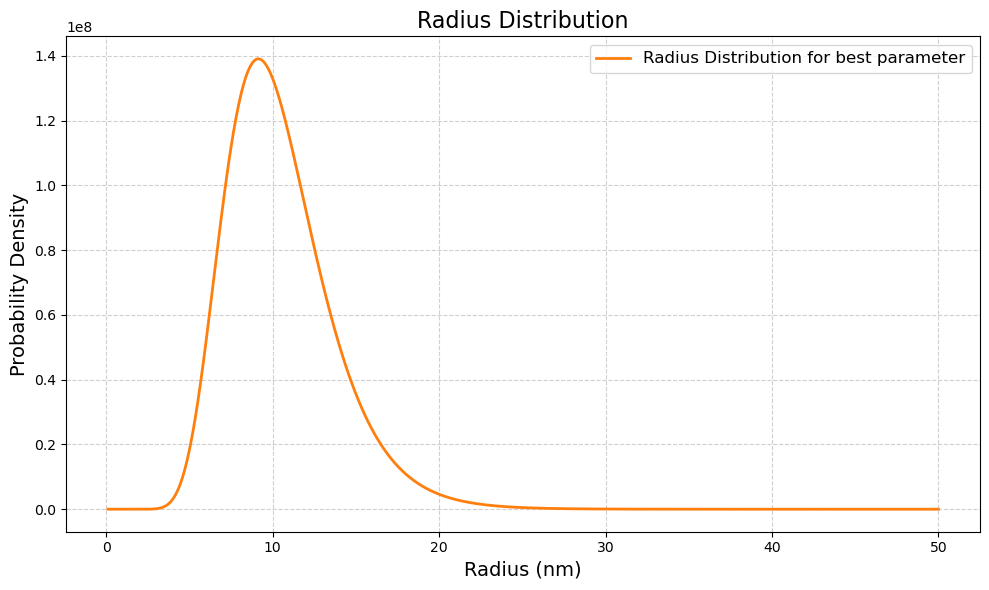

In [5]:
# draw the radius distribution
plt.figure(figsize=(10,6))
plt.plot(R_axis*1e9, R_dist(R_best, R_axis), label='Radius Distribution for best parameter', linewidth=2, color='tab:orange')
plt.xlabel('Radius (nm)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Radius Distribution', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

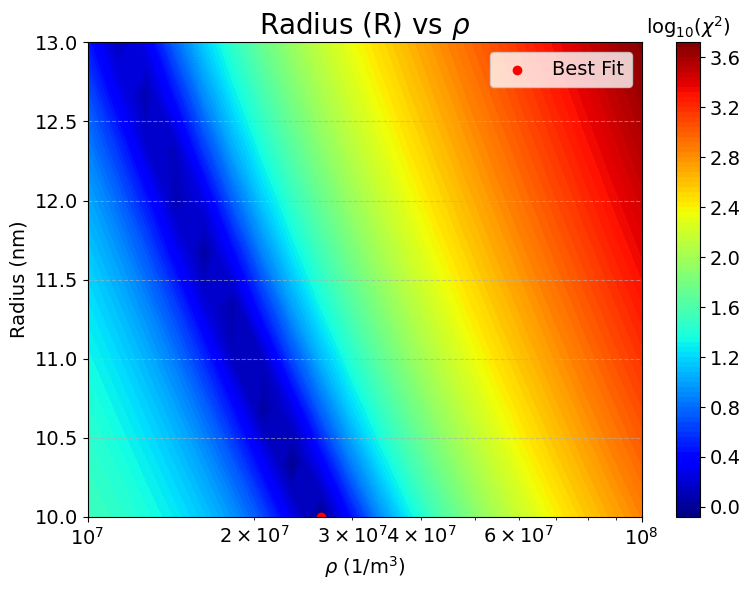

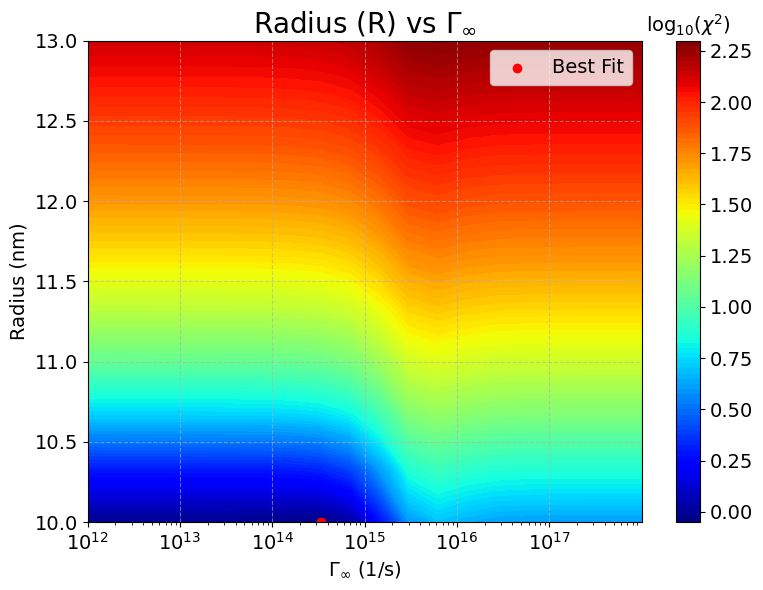

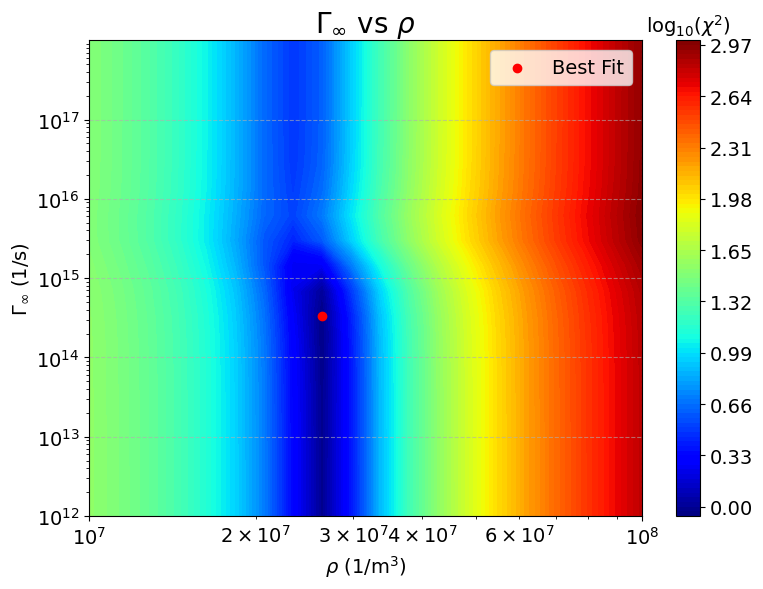

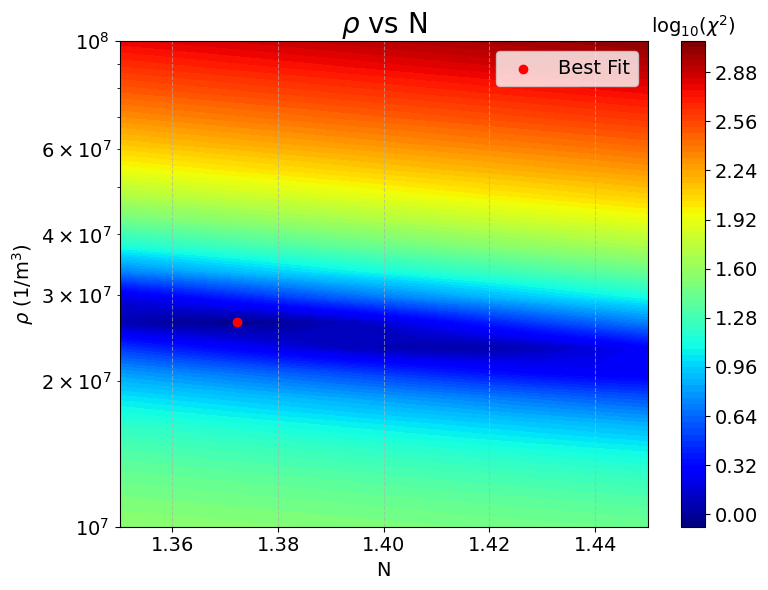

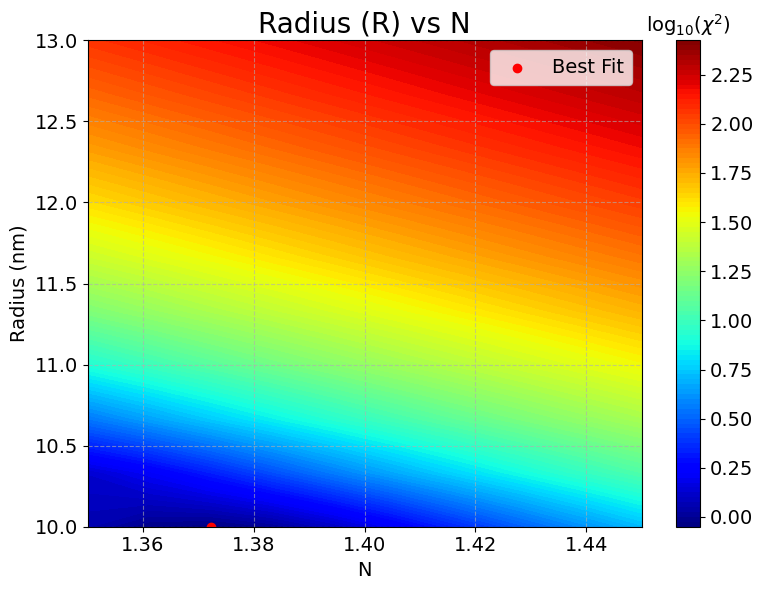

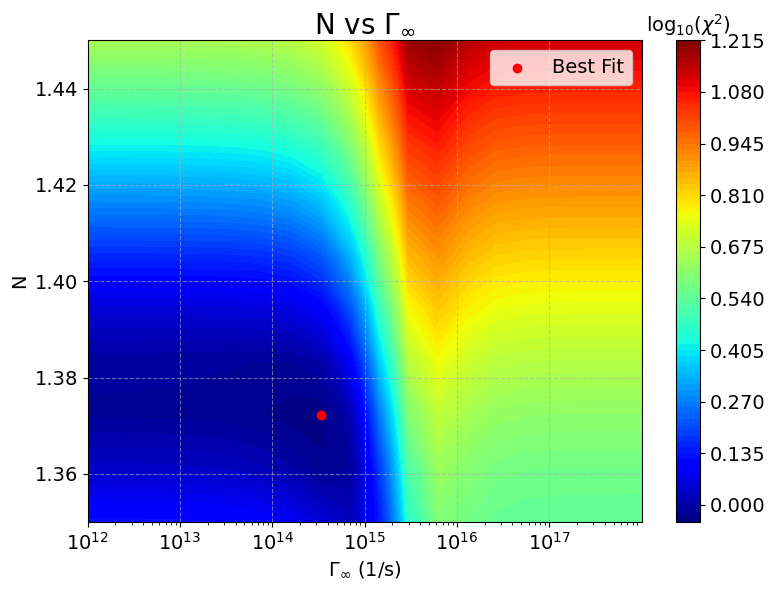

In [6]:
# Log of chi2
chi2_log = np.log10(chi2)
fs = 14
FS = 20
levels = 100
fig_s = (8, 6)

##################################################
# R vs ρ
plt.figure(figsize=fig_s)
#   plots
c1 = plt.contourf(Rho, R * 1e9, chi2_log[:, :, min_index[2], min_index[3]], levels=levels, cmap='jet')
plt.scatter(Rho_best, R_best * 1e9, color='red', label='Best Fit')
cbar = plt.colorbar(c1)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.xlabel(r'$\rho$ (1/m$^3$)', fontsize=fs)
plt.ylabel('Radius (nm)', fontsize=fs)

plt.title(r'Radius (R) vs $\rho$', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##################################################

# R vs Γ∞
plt.figure(figsize=fig_s)
#   plots
c2 = plt.contourf(Gamma_inf, R * 1e9, chi2_log[:, min_index[1], min_index[2], :], levels=levels, cmap='jet')
plt.scatter(Gamma_inf_best, R_best * 1e9, color='red', label='Best Fit')
cbar = plt.colorbar(c2)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.xlabel(r'$\Gamma_\infty$ (1/s)', fontsize=fs)
plt.ylabel('Radius (nm)', fontsize=fs)

plt.title(r'Radius (R) vs $\Gamma_\infty$', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##################################################

# ρ vs Γ∞
plt.figure(figsize=fig_s)
#   plots
c3 = plt.contourf(Rho, Gamma_inf, chi2_log[min_index[0], :, min_index[2], :].T, levels=levels, cmap='jet')
plt.scatter(Rho_best, Gamma_inf_best, color='red', label='Best Fit')
cbar = plt.colorbar(c3)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.ylabel(r'$\Gamma_\infty$ (1/s)', fontsize=fs)
plt.xlabel(r'$\rho$ (1/m$^3$)', fontsize=fs)

plt.title(r'$\Gamma_\infty$ vs $\rho$', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##################################################

# ρ vs N
plt.figure(figsize=fig_s)
c4 = plt.contourf(N, Rho, chi2_log[min_index[0], :, :, min_index[3]], levels=levels, cmap='jet')
plt.scatter(N_best, Rho_best, color='red', label='Best Fit')
cbar = plt.colorbar(c4)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.xlabel('N', fontsize=fs)
plt.ylabel(r'$\rho$ (1/m$^3$)', fontsize=fs)

plt.title(r'$\rho$ vs N', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##################################################

# R vs N
plt.figure(figsize=fig_s)
c5 = plt.contourf(N, R * 1e9, chi2_log[:, min_index[1], :, min_index[3]], levels=levels, cmap='jet')
plt.scatter(N_best, R_best * 1e9, color='red', label='Best Fit')
cbar = plt.colorbar(c5)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.xlabel('N', fontsize=fs)
plt.ylabel('Radius (nm)', fontsize=fs)

plt.title(r'Radius (R) vs N', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##################################################

# N vs Γ∞
plt.figure(figsize=fig_s)
c6 = plt.contourf(Gamma_inf, N, chi2_log[min_index[0], min_index[1], :, :], levels=levels, cmap='jet')
plt.scatter(Gamma_inf_best, N_best, color='red', label='Best Fit')
cbar = plt.colorbar(c6)

#   Settings for the plot
cbar.ax.tick_params(labelsize=fs)
cbar.ax.set_title(r'$\log_{10}(\chi^2)$', fontsize=fs)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.xlabel(r'$\Gamma_\infty$ (1/s)', fontsize=fs)
plt.ylabel('N', fontsize=fs)

plt.title(r'N vs $\Gamma_\infty$', fontsize=FS)
plt.legend(fontsize=fs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
print("Minimum index:", min_index)
chi2_target = chi2[tuple(min_index)]
print("Target chi2:", chi2_target)
tolerance = 1 * chi2_target  # tot% tolerance

# Find all points within the chi2 tolerance band
indices = np.where((chi2 >= chi2_target - tolerance) & (chi2 <= chi2_target + tolerance))
matplotlib.use('TkAgg')

# Prepare the corresponding R, Rho, Gamma_inf values
R_points = R[indices[0]]
Rho_points = Rho[indices[1]]
Gamma_inf_points = Gamma_inf[indices[3]]

# Randomly drop some points
num_points = len(R_points)
drop_indices = np.random.choice(num_points, num_points // 1, replace=False)
R_points = R_points[drop_indices]
Rho_points = Rho_points[drop_indices]
Gamma_inf_points = Gamma_inf_points[drop_indices]

# Scatter plot without using subplots
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(R_points, Rho_points, Gamma_inf_points, c='cyan', s=10)
ax.scatter(R_best, Rho_best, Gamma_inf_best, color='red', s=100, label='Minimum chi2')
ax.set_xlabel('R (m)')
ax.set_ylabel('Rho (m⁻³)')
ax.set_zlabel('Gamma_inf')
ax.set_xlim([R.min(), R.max()])
ax.set_ylim([Rho.min(), Rho.max()])
ax.set_zlim([Gamma_inf.min(), Gamma_inf.max()])
ax.set_title(f'Scatter of points with chi² ≈ {chi2_target} ± {tolerance}')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show(block=True)


Minimum index: (0, 8, 2, 8)
Target chi2: 0.9048197306267037
